In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np

In [ ]:
wells=pd.read_csv('../data/filtered_1.csv')

In [ ]:
wells.shape

(20005, 107)

In [ ]:
wells.head()

,Unformatted_API_UWI,WellName,StateProvince,County,ENVOperator,ENVWellType,ENVInterval,ENVWellboreStatus,FirstProdDate,Latitude,...,HCPV_PCT,HeightOfHCPV_FT,TotalOrganicCarbon_WTPCT,GasInitialRate,GasBFactor,GasInitialDecline,OilInitialRate,OilBFactor,OilInitialDecline,FirstProdYear
0,4238939890,ARROW STATE 452H,TX,REEVES,APA CORP,OIL,WOLFCAMP A LOWER,Producing,8/1/2022,31.685214,...,0.048,8.2,2.47,1.45,1.33,0.57,1.45,1.18,0.93,2022
1,4210933228,HS STATE 113-24X13 W102H,TX,CULBERSON,BP,GAS,WOLFCAMP A LOWER,Producing,9/1/2018,31.709190,...,0.036,6.4,2.29,1.27,1.50,0.54,0.80,1.35,0.19,2018
2,4247537783,UL WILLOW 383633-16 5H,TX,WARD,DEVON,OIL,3RD BONE SPRING SAND,Producing,8/1/2019,31.497941,...,0.051,6.1,3.04,NaN,NaN,NaN,1.31,1.35,0.46,2019
3,4230134775,LIZZY 26 421H,TX,LOVING,DEVON,OIL,WOLFCAMP A UPPER,Producing,3/1/2020,31.796166,...,0.078,9.9,3.90,0.80,1.15,0.15,0.80,1.35,0.07,2020
4,4238939597,CHIMERA STATE 56-3-7 UNIT 16H,TX,REEVES,OCCIDENTAL,GAS,WOLFCAMP A UPPER,Producing,6/1/2022,31.724241,...,0.054,8.3,2.79,1.63,1.12,0.85,1.05,1.35,0.73,2022


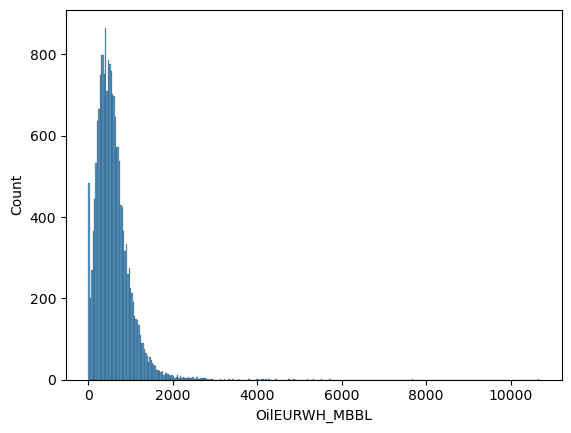

In [ ]:
# plot distribution of the target variable
sns.histplot(wells['OilEURWH_MBBL']);

In [ ]:
#Selecting subset of features to look at their distribution
wells_sub=wells[['First3MonthOil_BBL', 'First6MonthOil_BBL','First9MonthOil_BBL', 'MonthsToPeakProduction', 'PeakOil_BBL',
                'WellDensitySameZone', 'GammaRay_API']]

In [ ]:
wells_sub.head()

,First3MonthOil_BBL,First6MonthOil_BBL,First9MonthOil_BBL,MonthsToPeakProduction,PeakOil_BBL,WellDensitySameZone,GammaRay_API
0,95227.0,164476.0,199885.0,3.0,44600.0,0.43,68.94
1,6350.0,12918.0,20508.0,14.0,12096.0,0.71,64.91
2,35290.0,72264.0,93229.0,3.0,16131.0,0.80,86.17
3,28513.0,47353.0,62789.0,2.0,12963.0,NaN,91.64
4,63068.0,99407.0,132201.0,2.0,41383.0,0.46,88.95


C:\Users\Deeksha\AppData\Local\Temp\ipykernel_27856\568198266.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


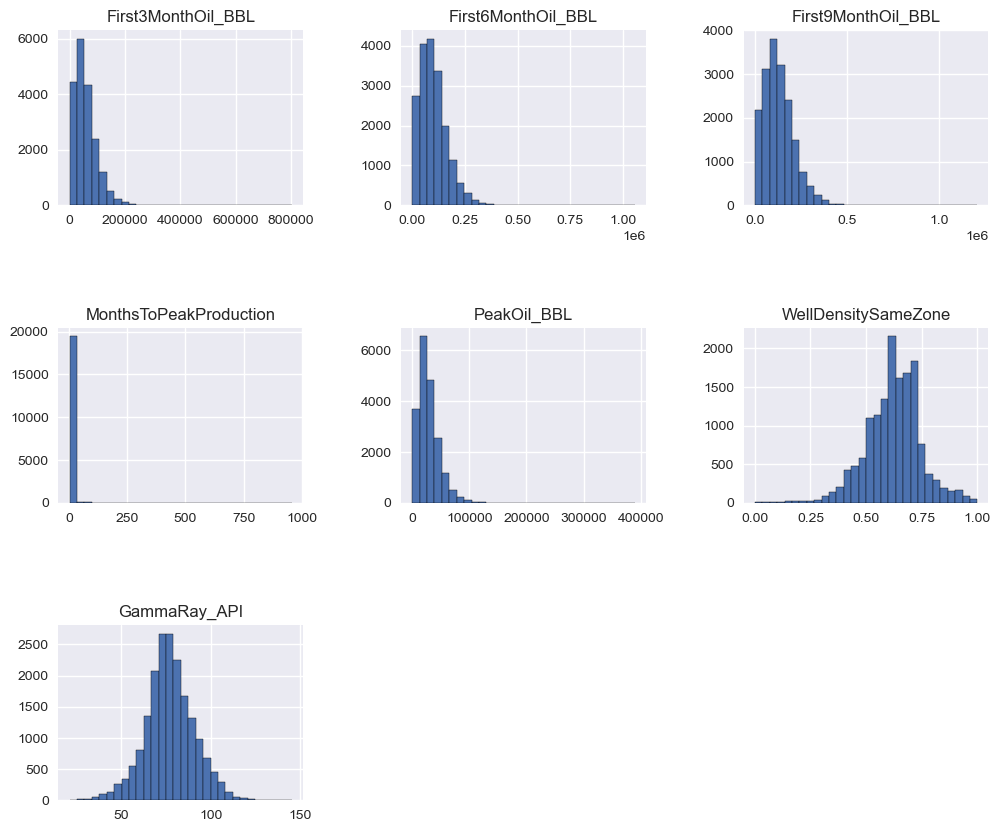

In [ ]:
# look at the distributions of the individual predictor variables
plt.style.use('seaborn')

wells_sub.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

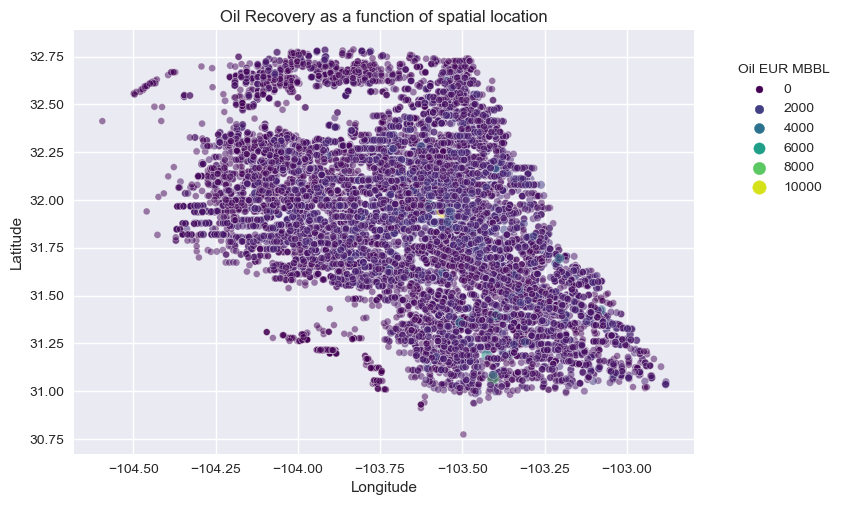

In [ ]:
# visualizing the spatial distribution of homes
sns.scatterplot(
    data=wells,
    x="Longitude",
    y="Latitude",
    size="OilEURWH_MBBL",
    hue="OilEURWH_MBBL",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="Oil EUR MBBL", bbox_to_anchor=(1.05, 0.95), loc="upper left")
plt.title("Oil Recovery as a function of spatial location");